# Feature Importance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
starcraft_loc = '../data/interimStarcraft_cleaned.csv'
#using index_col = 0 to drop the uncessary number column added by saving the data from the previous notebook.
starcraft = pd.read_csv(starcraft_loc,index_col = 0)
starcraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3338 entries, 0 to 3339
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3338 non-null   int64  
 1   LeagueIndex           3338 non-null   int64  
 2   Age                   3338 non-null   int64  
 3   HoursPerWeek          3338 non-null   int64  
 4   TotalHours            3338 non-null   int64  
 5   APM                   3338 non-null   float64
 6   SelectByHotkeys       3338 non-null   float64
 7   AssignToHotkeys       3338 non-null   float64
 8   UniqueHotkeys         3338 non-null   int64  
 9   MinimapAttacks        3338 non-null   float64
 10  MinimapRightClicks    3338 non-null   float64
 11  NumberOfPACs          3338 non-null   float64
 12  GapBetweenPACs        3338 non-null   float64
 13  ActionLatency         3338 non-null   float64
 14  ActionsInPAC          3338 non-null   float64
 15  TotalMapExplored     

# Importance for the entire data set:

In [3]:
#Split for testing feature importance on the whole set
SCfeatureNames = ['Age','HoursPerWeek','TotalHours','APM','SelectByHotkeys','AssignToHotkeys','UniqueHotkeys','MinimapAttacks','MinimapRightClicks','NumberOfPACs','GapBetweenPACs','ActionLatency','ActionsInPAC','TotalMapExplored','WorkersMade','UniqueUnitsMade','ComplexUnitsMade','ComplexAbilitiesUsed']
X = starcraft[SCfeatureNames]
y = starcraft['LeagueIndex']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=420)

In [4]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [5]:
#create a feature name sorting function based on feature importance
def feat_sort(features,importances):
    paired = zip(features,importances)
    res = sorted(paired, key = lambda x: x[1])
    toRet = []
    for x,y in res:
        toRet.append(x)
    return toRet

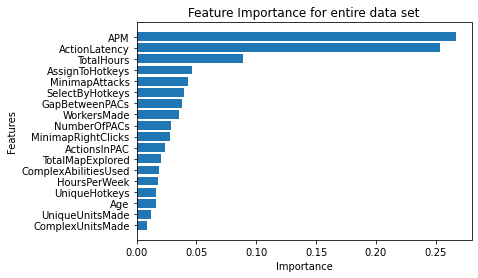

In [6]:
sorted_idx = rf.feature_importances_.argsort()
SCfeatureNamesSorted = feat_sort(SCfeatureNames,rf.feature_importances_)
plt.barh(SCfeatureNamesSorted, rf.feature_importances_[sorted_idx])
plt.title('Feature Importance for entire data set')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Importance for each league transition.
We will break the data set into sub sets containing each league transition, ie 1-2, 2-3, 3-4 so on and so forth, and check feature importance for each league transition

In [7]:
leagueTrans = []
for i in range(1,7): 
    leagueTrans.append(pd.concat([starcraft[starcraft['LeagueIndex'] == i],starcraft[starcraft['LeagueIndex'] == i+1]],axis=0))


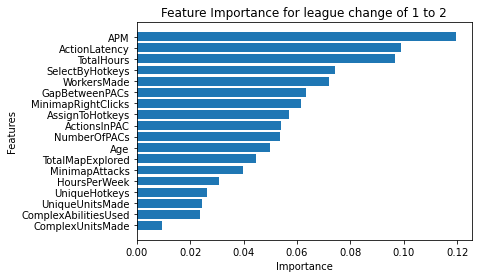

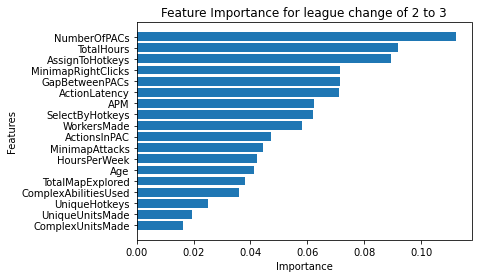

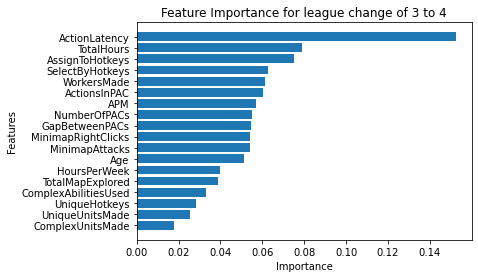

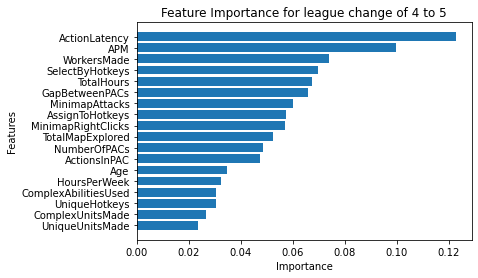

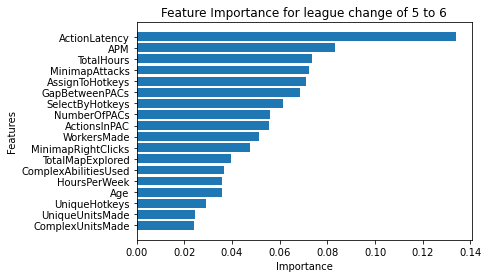

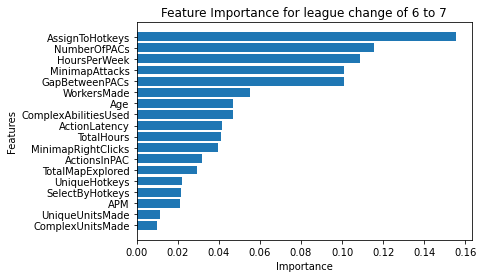

In [8]:
i=1
featImpPerTrans = []
featImpPairs = []
for transition in leagueTrans:
    i+=1
    X = transition[SCfeatureNames]
    y = transition['LeagueIndex']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=420)
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train, y_train)
    sorted_idx = rf.feature_importances_.argsort()
    SCfeatureNamesSorted = feat_sort(SCfeatureNames,rf.feature_importances_)
    featImpPerTrans.append(rf.feature_importances_.tolist())
    plt.barh(SCfeatureNamesSorted, rf.feature_importances_[sorted_idx])
    featImpPairs.append((SCfeatureNamesSorted,rf.feature_importances_[sorted_idx].tolist()))
    plt.title('Feature Importance for league change of '+str(i-1)+' to '+str(i))
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

In [9]:
colNames = ['Transition']
for name in SCfeatureNames:
    colNames.append(name)
importanceDF = pd.DataFrame(columns = colNames)
transNames = []
for i in range(1,7):
    transNames.append(str(i)+' - '+str(i+1))
i = 0
for importance in featImpPerTrans:
    importance.insert(0,transNames[i])
    importanceDF.loc[len(importanceDF.index)] = importance
    i+=1

In [10]:
importanceDF.set_index('Transition', inplace=True)
importanceDF.head()

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
Transition,,,,,,,,,,,,,,,,,,
1 - 2,0.049955,0.030711,0.096849,0.119367,0.074090,0.057160,0.026398,0.039745,0.061656,0.053599,0.063368,0.099128,0.053952,0.044537,0.072135,0.024262,0.009325,0.023763
2 - 3,0.041362,0.042144,0.091761,0.062236,0.061823,0.089358,0.025086,0.044523,0.071550,0.112092,0.071476,0.071243,0.047275,0.038163,0.058283,0.019380,0.016216,0.036029
3 - 4,0.051126,0.039748,0.078909,0.056786,0.062680,0.074899,0.028221,0.054048,0.054346,0.055233,0.054427,0.152285,0.060499,0.039013,0.061490,0.025294,0.017971,0.033025
4 - 5,0.034791,0.032325,0.067499,0.099675,0.069538,0.057350,0.030413,0.060064,0.057111,0.048610,0.065678,0.122497,0.047334,0.052529,0.073842,0.023546,0.026550,0.030649
5 - 6,0.035657,0.035739,0.073637,0.083285,0.061558,0.071068,0.029042,0.072130,0.047626,0.056008,0.068616,0.133745,0.055438,0.039562,0.051506,0.024427,0.024210,0.036745


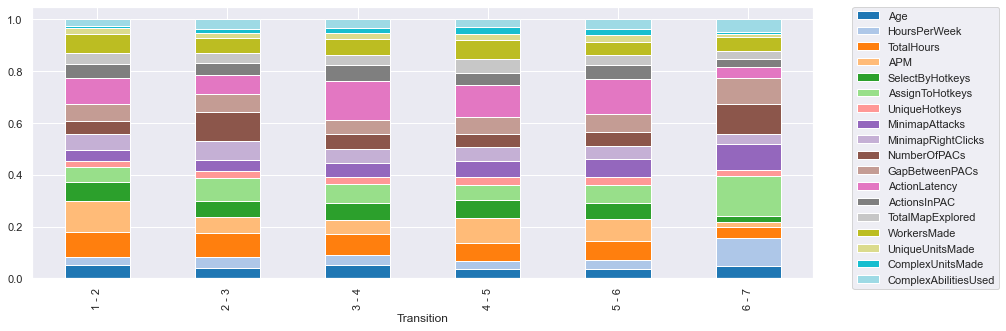

In [11]:
sns.set(rc = {'figure.figsize':(14,5)})
colors = cm.get_cmap('tab20',18)
importanceDF.plot(kind='bar',stacked=True,colormap=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [12]:
top5DF = pd.DataFrame(columns = ['Transition','top1','top2','top3','top4','top5'])
i = 0
for names,imps in featImpPairs:
    row = [transNames[i]]
    for x in range(17,12,-1):
        row.append((names[x],imps[x]))
    top5DF.loc[len(top5DF.index)] = row
    i+=1
top5DF.set_index('Transition',inplace=True)
top5DF
toPlotDF = importanceDF
for col in toPlotDF.columns:
    for i in transNames:
        if toPlotDF.loc[i,col] < top5DF.loc[i,"top5"][1]:
            toPlotDF.loc[i,col] = None

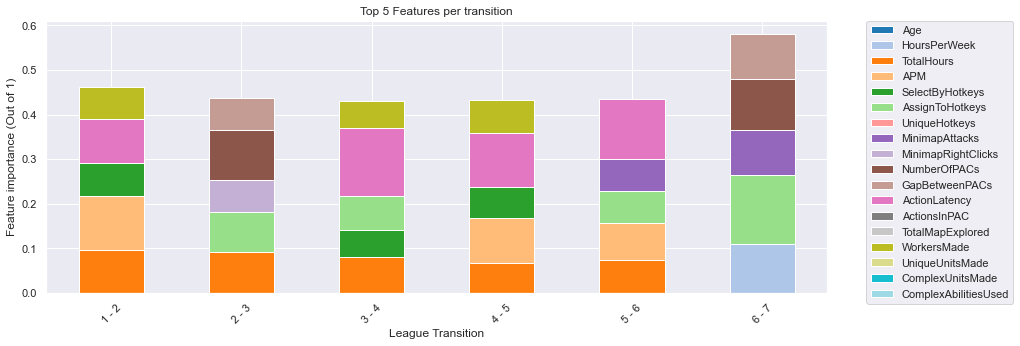

In [13]:
colors = cm.get_cmap('tab20',18)
toPlotDF.plot(kind='bar',stacked=True,colormap=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('League Transition')
plt.ylabel('Feature importance (Out of 1)')
plt.xticks(rotation=45)
plt.title('Top 5 Features per transition')
plt.show()